### <b> Credit Card Defaulter's </b>
##### <i> Mahua Dwivedi </i>

#### <u> Predictive model using Logistic Regression </u>
Problem statement: Predicting whether a customer will default on his/her credit card. Credit card default occurs when a credit cardholder fails to make the minimum required payment on their card within the specified time frame.

### <B> Data cleaning & exploration</B>
#### Import libraries

In [1]:
#!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd #present working directory

'C:\\Users\\hp\\Desktop\\Jupyter\\Personal'

In [4]:
df=pd.read_excel('C:\mahua\Projects\Credit card defaulter\default_Data.xlsx')

#### Data description

In [5]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


#### Data information

In [6]:
df.shape

(30000, 25)

In [7]:
df.describe().T #.T for transpose to get clearer view

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,0.994933,2.712002,-1.0,0.00,0.0,1.00,9.0
PAY_2,30000.0,1.252967,3.096551,-1.0,0.00,0.0,2.00,9.0
PAY_3,30000.0,1.331633,3.189356,-1.0,0.00,0.0,2.00,9.0
PAY_4,30000.0,1.373600,3.269400,-1.0,0.00,0.0,2.00,9.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30000 non-null  int64
 1   LIMIT_BAL        30000 non-null  int64
 2   SEX              30000 non-null  int64
 3   EDUCATION        30000 non-null  int64
 4   MARRIAGE         30000 non-null  int64
 5   AGE              30000 non-null  int64
 6   PAY_0            30000 non-null  int64
 7   PAY_2            30000 non-null  int64
 8   PAY_3            30000 non-null  int64
 9   PAY_4            30000 non-null  int64
 10  PAY_5            30000 non-null  int64
 11  PAY_6            30000 non-null  int64
 12  BILL_AMT1        30000 non-null  int64
 13  BILL_AMT2        30000 non-null  int64
 14  BILL_AMT3        30000 non-null  int64
 15  BILL_AMT4        30000 non-null  int64
 16  BILL_AMT5        30000 non-null  int64
 17  BILL_AMT6        30000 non-null  int64
 18  PAY_AM

##### >> The dtypes and null values are already handled

In [9]:
# changing the type if there was an error..
# >> df['col to change']=df['col to change'].astype('str')
# if there were any null 
# >> df.fillna()

In [10]:
# checking duplicate
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [11]:
df.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default payment    0
dtype: int64

<Axes: >

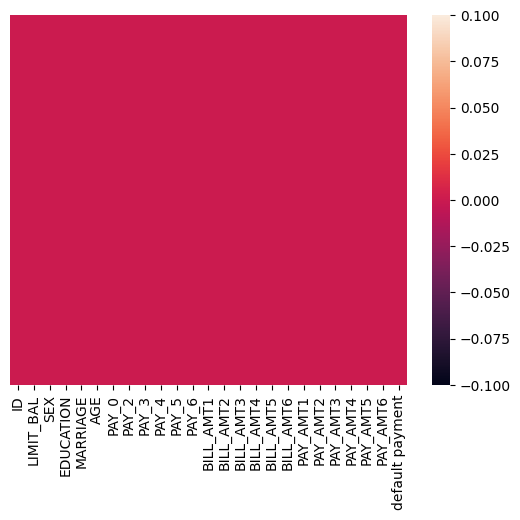

In [12]:
sns.heatmap(df.isnull(), cbar=True, yticklabels=False )

### <b>Data Processing</b>

In [13]:
#renaming of columns
df.rename(columns={'default payment' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [14]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_SEPT,2,-1,0,0,-1
PAY_AUG,2,2,0,0,0
PAY_JUL,-1,0,0,0,-1
PAY_JUN,-1,0,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             30000 non-null  int64
 1   LIMIT_BAL      30000 non-null  int64
 2   SEX            30000 non-null  int64
 3   EDUCATION      30000 non-null  int64
 4   MARRIAGE       30000 non-null  int64
 5   AGE            30000 non-null  int64
 6   PAY_SEPT       30000 non-null  int64
 7   PAY_AUG        30000 non-null  int64
 8   PAY_JUL        30000 non-null  int64
 9   PAY_JUN        30000 non-null  int64
 10  PAY_MAY        30000 non-null  int64
 11  PAY_APR        30000 non-null  int64
 12  BILL_AMT_SEPT  30000 non-null  int64
 13  BILL_AMT_AUG   30000 non-null  int64
 14  BILL_AMT_JUL   30000 non-null  int64
 15  BILL_AMT_JUN   30000 non-null  int64
 16  BILL_AMT_MAY   30000 non-null  int64
 17  BILL_AMT_APR   30000 non-null  int64
 18  PAY_AMT_SEPT   30000 non-null  int64
 19  PAY_

### <b> EDA: Exploratory Data Analysis </b>

In [16]:
# checking the defaulters
df['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

([<matplotlib.patches.Wedge at 0x23e8e0e93d0>,
 [Text(-0.8449152390547128, 0.704356613380692, ''),
  Text(0.8449152720280249, -0.7043565738273541, '')],
 [Text(-0.46086285766620694, 0.38419451638946833, '77.9%'),
  Text(0.46086287565164985, -0.38419449481492035, '22.1%')])

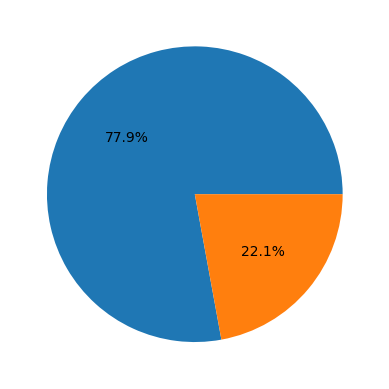

In [17]:
plt.pie(df['IsDefaulter'].value_counts(),autopct='%1.1f%%')

<Axes: xlabel='SEX', ylabel='count'>

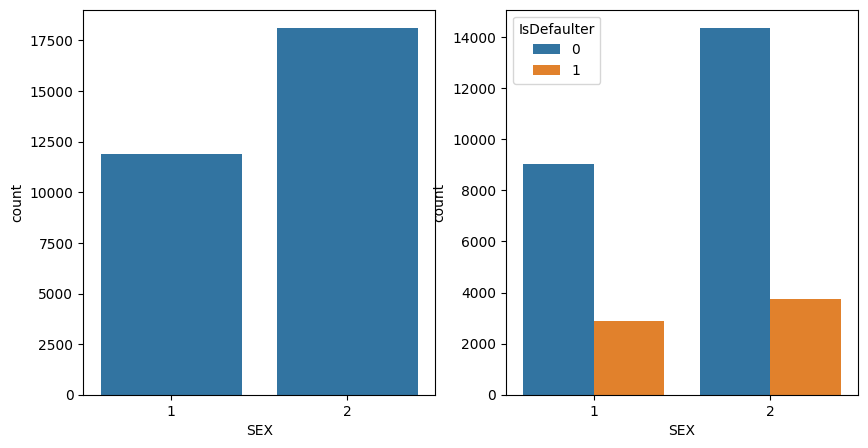

In [18]:
# categorial
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)

<Axes: xlabel='EDUCATION', ylabel='count'>

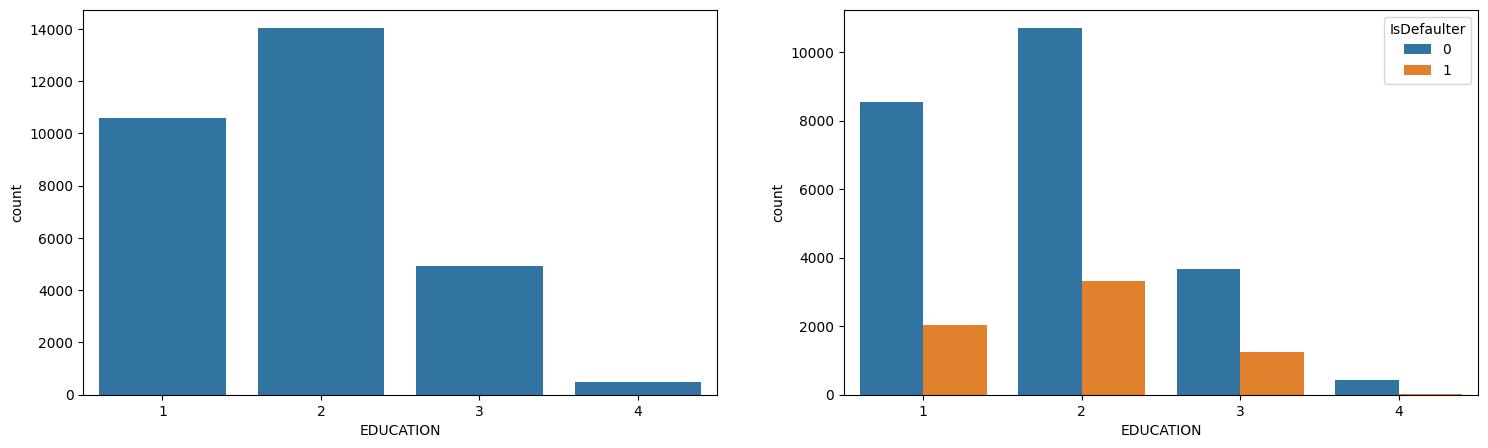

In [19]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)

<Axes: xlabel='MARRIAGE', ylabel='count'>

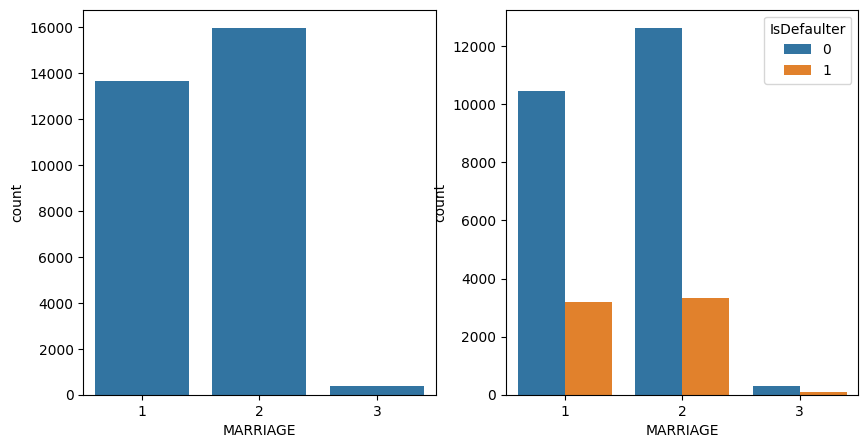

In [20]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

<Axes: xlabel='AGE', ylabel='count'>

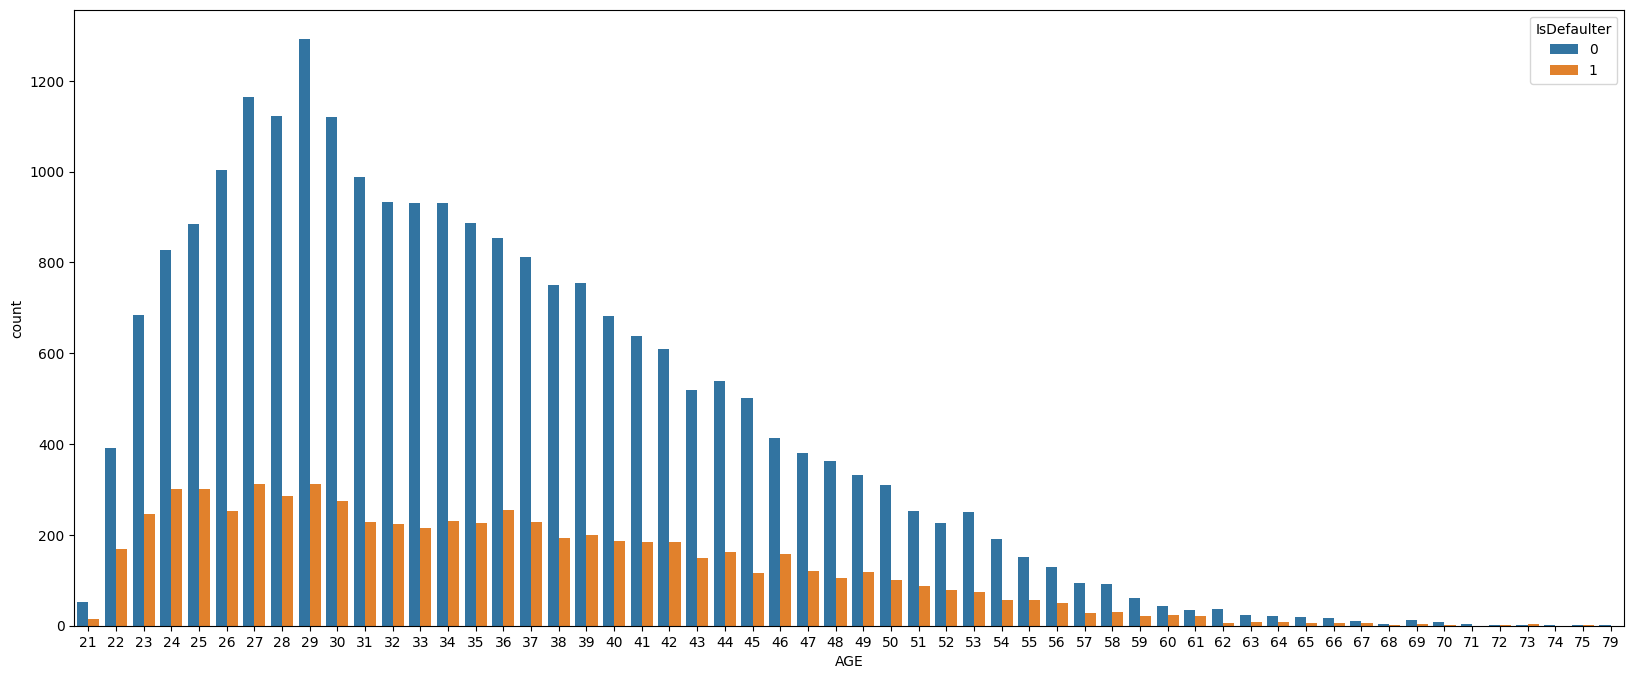

In [21]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)




*   There are more fmales credit card hso henceer,so nodefaultersulter a have high proportion of females.
*   No. of defaulters have a higher proportion of educated people  (graduate school and university)
*  No. of defaulters have a higher proportion of Ss.






### <b> Check correlation </b>

In [22]:
df.corr(numeric_only=True)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
ID,1.000000,0.026179,0.018497,0.037659,-0.028208,0.018678,0.051722,0.025860,0.025643,0.029568,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.231088,-0.111012,0.144713,0.125978,0.117524,0.106298,0.099564,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.013627,-0.028522,-0.090874,0.037562,0.037927,0.037895,0.027314,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.037659,-0.231088,0.013627,1.000000,-0.136797,0.182434,-0.034125,-0.056175,-0.063648,-0.062451,...,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
MARRIAGE,-0.028208,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,-0.028484,-0.029609,-0.029833,-0.031421,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.018678,0.144713,-0.090874,0.182434,-0.412001,1.000000,0.043696,0.043672,0.043038,0.045112,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_SEPT,0.051722,0.125978,0.037562,-0.034125,-0.028484,0.043696,1.000000,0.787579,0.669667,0.610590,...,-0.120762,-0.111999,-0.107439,-0.014507,0.007976,-0.008966,0.004628,0.007002,0.005055,0.054685
PAY_AUG,0.025860,0.117524,0.037927,-0.056175,-0.029609,0.043672,0.787579,1.000000,0.797131,0.687111,...,-0.170150,-0.159310,-0.153973,-0.082926,-0.020131,-0.035663,-0.016565,-0.022335,-0.027885,0.060361
PAY_JUL,0.025643,0.106298,0.037895,-0.063648,-0.029833,0.043038,0.669667,0.797131,1.000000,0.809717,...,-0.195089,-0.183138,-0.175622,-0.066679,-0.072576,-0.042184,-0.024659,-0.028681,-0.030782,0.047675
PAY_JUN,0.029568,0.099564,0.027314,-0.062451,-0.031421,0.045112,0.610590,0.687111,0.809717,1.000000,...,-0.214570,-0.203033,-0.193931,-0.062127,-0.055910,-0.087214,-0.045047,-0.036804,-0.033123,0.043745


Values more than 0.7 is considered to be highly corelated and lower than this is relatively less corelated

<Axes: >

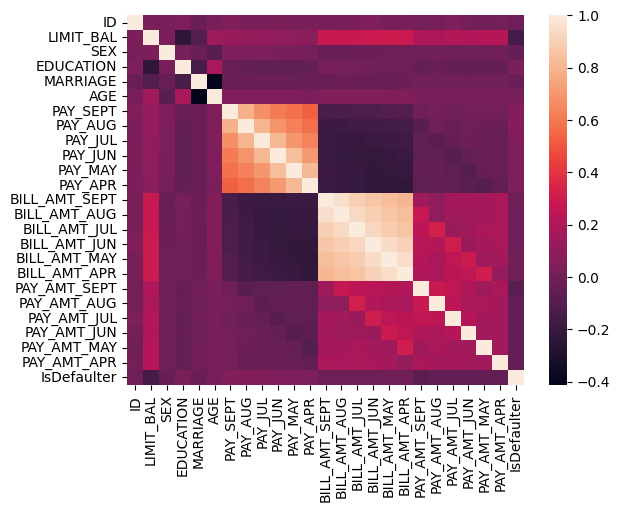

In [23]:
sns.heatmap(df.corr(numeric_only=True))

### <b> Handling Class Imbalance </b>

#### Checking for Imbalance
* Using the SMOTE i.e. Synthetic Minority Oversampling technique
* Class imbalance occurs when one class in the dataset is significantly underrepresented compared to other classes, which can lead to biased model performance favoring the majority class.
* Class imbalance leads to biased models favoring the majority class.

In [24]:
print('Original unbalanced dataset shape:', len(df))

Original unbalanced dataset shape: 30000


In [25]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_SEPT,2,-1,0,0,-1
PAY_AUG,2,2,0,0,0
PAY_JUL,-1,0,0,0,-1
PAY_JUN,-1,0,0,0,0


In [26]:
smote = SMOTE()

In [27]:
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

In [28]:
print('Resampled balanced dataset shape: ', len(y_smote))

Resampled balanced dataset shape:  46728


In [29]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))

In [30]:
#adding target variable to new created dataframe
balanced_df['IsDefaulter'] = y_smote
balanced_df['IsDefaulter'].value_counts()

1    23364
0    23364
Name: IsDefaulter, dtype: int64

In [31]:
col=['ID','EDUCATION','MARRIAGE']
balanced_df.drop(col, inplace=True,axis=1)

In [32]:
balanced_df.shape

(46728, 22)

In [33]:
balanced_df.head().T

,0,1,2,3,4
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
AGE,24,26,34,37,57
PAY_SEPT,2,-1,0,0,-1
PAY_AUG,2,2,0,0,0
PAY_JUL,-1,0,0,0,-1
PAY_JUN,-1,0,0,0,0
PAY_MAY,9,0,0,0,0
PAY_APR,9,2,0,0,0
BILL_AMT_SEPT,3913,2682,29239,46990,8617


In [34]:
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [35]:
X.shape

(46728, 21)

In [36]:
y.shape

(46728,)

### <b> Data Transformation </b>

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

##### Splitting the Data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [39]:
X_train.shape

(37382, 21)

### Implementing Logistic Regression Model 

In [40]:
lr = LogisticRegression(fit_intercept=True, max_iter=100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [41]:
#class prediction of y
y_pred_logi = lr.predict(X_test)
y_train_pred_logi=lr.predict(X_train)

In [42]:
# Generate the classification report for training data
report = classification_report(y_train_pred_logi, y_train)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.65      0.66      0.66     18414
           1       0.67      0.66      0.66     18968

    accuracy                           0.66     37382
   macro avg       0.66      0.66      0.66     37382
weighted avg       0.66      0.66      0.66     37382



In [43]:
# Generate the classification report for test data
report = classification_report(y_pred_logi, y_test)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      4517
           1       0.67      0.65      0.66      4829

    accuracy                           0.66      9346
   macro avg       0.66      0.66      0.66      9346
weighted avg       0.66      0.66      0.66      9346



#### Creating the confusion matrix

In [44]:
confusion_matrix(y_test,y_pred_logi)

array([[2994, 1679],
       [1523, 3150]], dtype=int64)

### Implementing Random Forest Classifier

In [45]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
#class prediction of y
y_pred = rfc.predict(X_test)
y_train_pred=rfc.predict(X_train)

In [47]:
# Generate the classification report for training data
report = classification_report(y_train_pred, y_train)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18683
           1       1.00      1.00      1.00     18699

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382



In [48]:
# Generate the classification report for test data
report = classification_report(y_pred, y_test)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4921
           1       0.82      0.87      0.85      4425

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.85      9346
weighted avg       0.85      0.85      0.85      9346



In [49]:
confusion_matrix(y_test,y_pred)

array([[4100,  573],
       [ 821, 3852]], dtype=int64)

### Implementing Decision Tree Classifier

In [50]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [52]:
# Generate the classification report for training data
report = classification_report(y_train_pred_dtc, y_train)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18727
           1       1.00      1.00      1.00     18655

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382



In [53]:
# Generate the classification report for test data
report = classification_report(y_pred_dtc, y_test)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      4515
           1       0.79      0.76      0.77      4831

    accuracy                           0.77      9346
   macro avg       0.77      0.77      0.77      9346
weighted avg       0.77      0.77      0.77      9346



In [54]:
confusion_matrix(y_test,y_pred_dtc)

array([[3521, 1152],
       [ 994, 3679]], dtype=int64)

#### Conclusion:
* Accuracy resultant:
      * Logistic Regression: 65%
      * Random Forest Classifier: 85%
      * Decision Tree Classifier: 77%
  
* Random Forest Classifier Resulted in higher accuracy... Also, the False Positives and False Negatives, Recall, and Precision are significantly less in Random Forest.
* Hence prefer, Random forest over Logistic Regression and Decision Tree Classifier.